# det

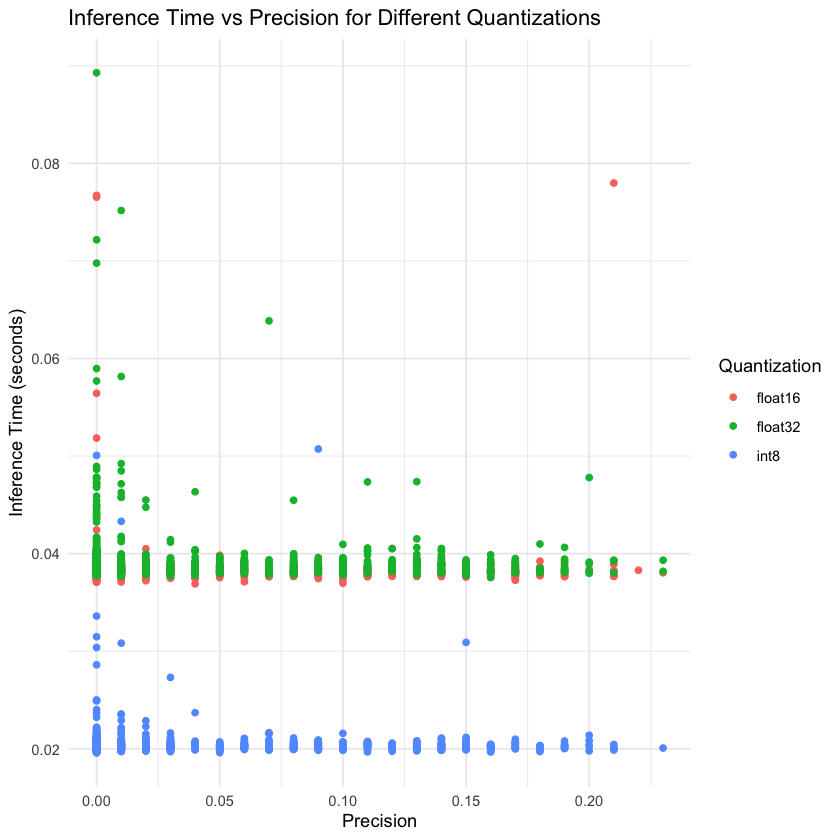

In [35]:
data <- read.csv("../data/det.csv")

library(ggplot2)

ggplot(data, aes(x = precision, y = inference_time, color = quantization)) +
  geom_point() +
  labs(title = "Inference Time vs Precision for Different Quantizations",
       x = "Precision",
       y = "Inference Time (seconds)",
       color = "Quantization") +
  theme_minimal()

ggsave("../docs/assets/det-plot1.png", width = 10, height = 7, units = "in", dpi = 900)

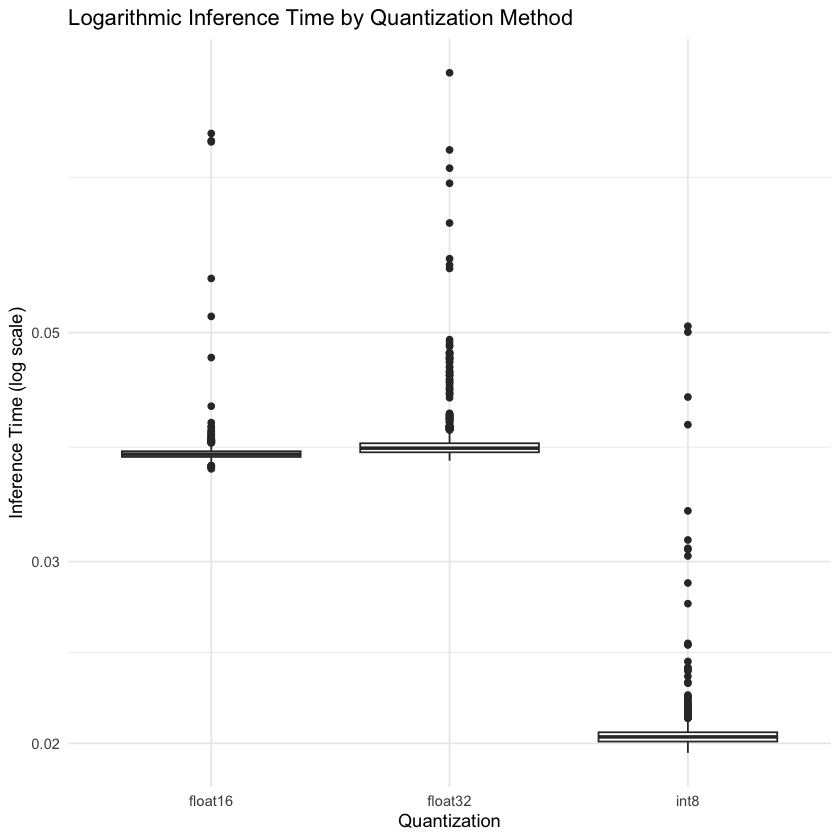

In [36]:
library(ggplot2)
library(readr)

ggplot(data, aes(x = quantization, y = inference_time)) +
  geom_boxplot() +
  scale_y_log10() +
  labs(title = "Logarithmic Inference Time by Quantization Method",
       x = "Quantization",
       y = "Inference Time (log scale)") +
  theme_minimal()

ggsave("../docs/assets/det-plot2.png", width = 10, height = 7, units = "in", dpi = 900)

In [41]:
for (quant in unique(data$quantization)) {
  subset <- data[data$quantization == quant, ]
  correlation <- cor(subset$inference_time, subset$precision)
  print(paste("Perf correlation for", quant, ":", correlation))
}

[1] "Perf correlation for int8 : -0.0236756526195283"
[1] "Perf correlation for float16 : 0.0232883892068324"
[1] "Perf correlation for float32 : -0.0365188366830796"
